<a href="https://colab.research.google.com/github/call493/MLFC/blob/main/_notebooks/01-03-objective-functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective Functions

### 2025-09-03

**Abstract**: In this session we introduce the notion of objective
functions and show how they can be used in a simple recommender system
based on *matrix factorisation*.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## ML Foundations Course Notebook Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We install some bespoke codes for creating and saving plots as well as
loading data sets.

In [1]:
%%capture
%pip install notutils
%pip install pods
%pip install mlai

In [2]:
import notutils
import pods
import mlai
import mlai.plot as plot

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

On Monday we introduce machine learning and motivate the importance of
probability. We suggested that many machine learning algorithms can be
motivated by considering a prediction funcation and an objective
function. Together these form our mode that can be combined with data
through computation and used to make predictions.

We also motivated the importance of probability. We introduced Laplace’s
Gremlin and suggested that probability is a way of representing our
ignorance. But objective functions are not always motivated by
probability. Today we consider the optimisation of objective functions.

But before we start specifically on objective functions we consider the
oldest machine learning algorithm, the perceptron.

## Introduction to Classification

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/classification-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/classification-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Classification is perhaps the technique most closely assocated with
machine learning. In the speech based agents, on-device classifiers are
used to determine when the wake word is used. A wake word is a word that
wakes up the device. For the Amazon Echo it is “Alexa,” for Siri it is
“Hey Siri.” Once the wake word detected with a classifier, the speech
can be uploaded to the cloud for full processing, the speech recognition
stages.

This isn’t just useful for intelligent agents, the UN global pulse
project on public discussion on radio also uses [wake word detection for
recording radio conversations](https://radio.unglobalpulse.net/uganda/).

A major breakthrough in image classification came in 2012 with the
ImageNet result of [Alex Krizhevsky, Ilya Sutskever and Geoff
Hinton](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-)
from the University of Toronto. ImageNet is a large data base of 14
million images with many thousands of classes. The data is used in a
community-wide challenge for object categorization. Krizhevsky et al
used convolutional neural networks to outperform all previous approaches
on the challenge. They formed a company which was purchased shortly
after by Google. This challenge, known as object categorisation, was a
major obstacle for practical computer vision systems. Modern object
categorization systems are close to human performance.

Machine learning problems normally involve a prediction function and an
objective function. Regression is the case where the prediction function
iss over the real numbers, so the codomain of the functions,
$f(\mathbf{X})$ was the real numbers or sometimes real vectors. The
classification problem consists of predicting whether or not a
particular example is a member of a particular class. So we may want to
know if a particular image represents a digit 6 or if a particular user
will click on a given advert. These are classification problems, and
they require us to map to *yes* or *no* answers. That makes them
naturally discrete mappings.

In classification we are given an input vector, $\mathbf{ x}$, and an
associated label, $y$ which either takes the value $-1$ to represent
*no* or $1$ to represent *yes*.

In supervised learning the inputs, $\mathbf{ x}$, are mapped to a label,
$y$, through a function $f(\cdot)$ that is dependent on a set of
parameters, $\mathbf{ w}$, $$
y= f(\mathbf{ x}; \mathbf{ w}).
$$ The function $f(\cdot)$ is known as the *prediction function*. The
key challenges are (1) choosing which features, $\mathbf{ x}$, are
relevant in the prediction, (2) defining the appropriate *class of
function*, $f(\cdot)$, to use and (3) selecting the right parameters,
$\mathbf{ w}$.

## Classification Examples

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/classification-examples.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/classification-examples.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

There are many difference examples of classification problems. One of
theoldest is the classification of hand written digits from binary
images. The MNIST data was for a long time considered one of the most
difficult data sets.

When we download this data we are making use of open source code,
through the [scikit learn](https://scikit-learn.org/stable/) project,
and the [OpenML](https://www.openml.org/) project which provides open
access to data.

This reflects a tradition of openness in machine learning that has
enabled the tools to be deployed.

## Subsample of the MNIST Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/mnist-digits-subsample-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/mnist-digits-subsample-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will look at a sub-sample of the MNIST digit data set.

First load in the MNIST data set from scikit learn. This can take a
little while because it’s large to download.

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784')

Sub-sample the dataset to make the training faster.

In [6]:
import numpy as np

In [7]:
np.random.seed(0)
digits = [0,1,2,3,4]
N_per_digit = 100
Y = []
labels = []
for d in digits:
    imgs = mnist['data'][mnist['target']==str(d)]
    Y.append(imgs.loc[np.random.permutation(imgs.index)[:N_per_digit]])
    labels.append(np.ones(N_per_digit)*d)
Y = np.vstack(Y).astype(np.float64)
labels = np.hstack(labels)
Y /= 255

Now let’s visualise some examples from our subsampled dataset to get a
sense of what the data looks like.

## MNIST Digit Examples

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/mnist-digits-plot.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/mnist-digits-plot.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [8]:
import mlai
import mlai.plot as plot
import matplotlib.pyplot as plt

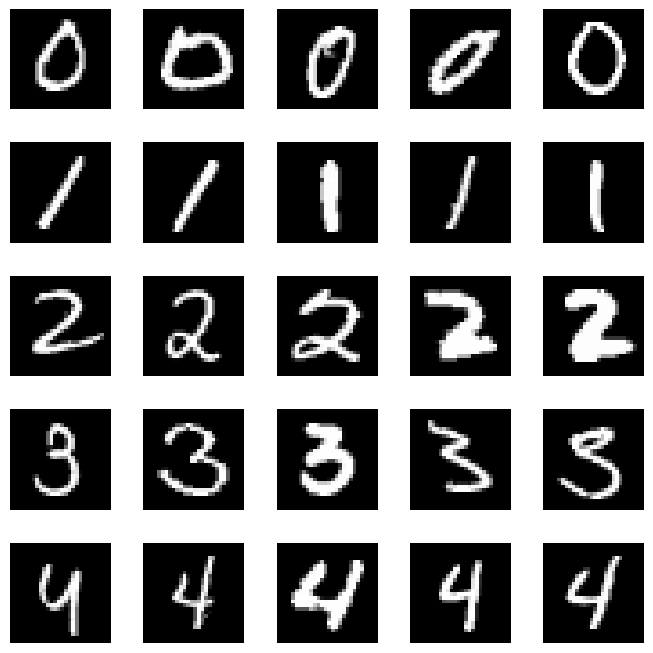

<Figure size 640x480 with 0 Axes>

In [9]:
# Visualize examples of each digit
fig, axes = plt.subplots(5, 5, figsize=plot.big_figsize)

for digit in digits:
    # Get indices for this digit
    digit_indices = np.where(labels == digit)[0]

    # Show first 5 examples of this digit
    for i in range(5):
        row = int(digit)
        col = i

        # Reshape 784-dim vector back to 28x28 image
        image = Y[digit_indices[i]].reshape(28, 28)

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()
mlai.write_figure("mnist-digits-subsample-examples.svg", directory="./datasets")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/mnist-digits-subsample-examples.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Examples of MNIST digits 0-4 from our subsampled dataset,
showing 10 examples of each digit.</i>

The visualization shows the variety in handwritten digits even within
the same class. Each row represents a different digit (0 through 4), and
each column shows a different example of that digit.

While the MNIST data doesn’t capture all the nuances of the challenges
we face in modern machine learning. It has been an important benchmark
data set for and can still be a useful data set for learning about
classfication algorithms.

## Hyperplane

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/classification.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/classification.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The objective of classification is to predict the class the class label,
$y_i$, given the features associated with that data point,
$\mathbf{ x}_i$, using the *prediction function*. If we are using a
linear model, then we can define the prediction function as\* Predict
class label $y_i$ \* Using data features $\mathbf{ x}_i$ \* Through the
prediction function} $$
f(x_i) = \text{sign}\left(\mathbf{ w}^\top \mathbf{ x}_i + b\right),
$$ where the prediction here is `+1` for the positive class and `-1` for
the negative class.

In this linear model the decision boundary for classification is given
by a *hyperplane*. The vector, $\mathbf{ w}$, is the *[normal
vector](http://en.wikipedia.org/wiki/Normal_(geometry))* to the
hyperplane. Any hyperplane can be described by formula
$\mathbf{ w}^\top \mathbf{ x}= -b$.

Note that this is the same linear form that underpins *linear
regression* but here it is being used to define the hyperplane rather
than the regression weights

## Toy Data

We’ll consider a toy data set and a decision boundary that separates red
crosses from green circles.

In [10]:
import numpy as np

In [11]:
np.random.seed(seed=1000001)
x_plus = np.random.normal(loc=1.3, size=(30, 2))
x_minus = np.random.normal(loc=-1.3, size=(30, 2))

In [12]:
import mlai
import mlai.plot as plot
import matplotlib.pyplot as plt

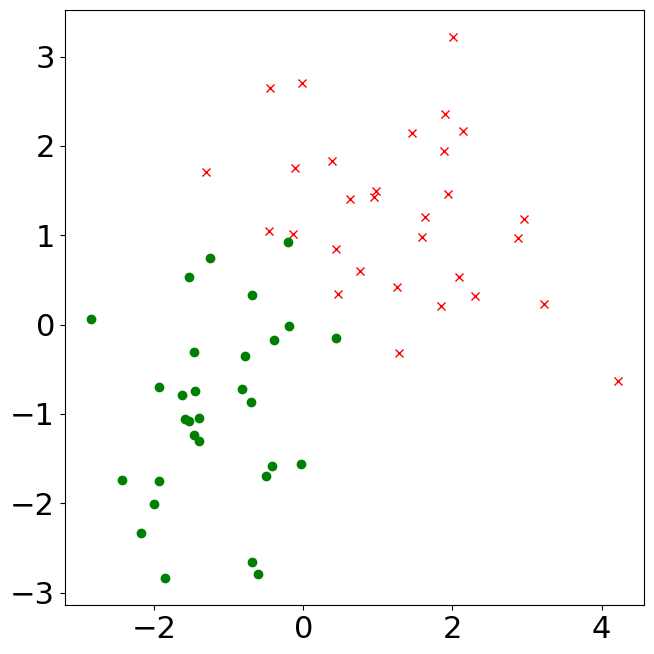

<Figure size 640x480 with 0 Axes>

In [14]:
# plot data
fig, ax = plt.subplots(figsize=plot.big_figsize)
ax.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
ax.plot(x_minus[:, 0], x_minus[:, 1], 'go')

plt.tight_layout()
plt.show()
mlai.write_figure("artificial-classification-example.svg", directory="./ml")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/artificial-classification-examples.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Red crosses and green circles are sampled from two separate
Gaussian distributions with 30 examples of each.</i>

## The Perceptron

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/perceptron.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/perceptron.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Perceptron (Rosenblatt (1958)) is perhaps the oldest machine
learning algorithm. The algorithm was inspired by ideas of statistical
pattern recognition and was developed by Frank Rosenblatt at Cornell
University in the 1950s.

{

## Mathematical Drawing of Decision Boundary

We draw a hyper plane at decision boundary. The *decision boundary* is
where a point moves from being classified as -1 to +1. For our two
dimensional feature space it is defined by $$
\text{sign}(\mathbf{ x}^\top \mathbf{ w}) = \text{sign}(w_0 + w_1x_{i,1} + w_2 x_{i, 2})
$$ where $x_{i, 1}$ is first feature $x_{i, 2}$ is second feature and
assume $x_{0,i}=1$, in other words it plays the role of the bias, $b$.
So setting $w_0 = b$ we have $$
\text{sign}\left(w_1 x_{i, 1} + w_2 x_{i, 2} + b\right)
$$

## Reminder: Equation of Plane

The prediction function is $$
\text{sign}\left(w_1 x_{i, 1} + w_2 x_{i, 2} + b\right)
$$ and the equation of a plane is $$
w_1 x_{i, 1} + w_2 x_{i, 2} + b = 0
$$ or $$
w_1 x_{i, 1} + w_2 x_{i, 2} = -b.
$$ This is also the precise point that the argument of the
$\text{sign}(\cdot)$ function is zero in our Perceptron algorithm. So
it’s the point at which a point switches from being classified negative
to being classified positive (or vice versa).

The next step is to initialise the Preceptron model and draw a decision
boundary.

## Perceptron Algorithm: Initialisation Maths

There’s no single way to initialise an algorithm like the Perceptron,
but here’s a way that is informative because it helps see why the
Perceptron works. We will take a randomly chosen data point, $i$, and
set $$
\mathbf{ w}= y_i \mathbf{ x}_i.
$$ Why is this sensible? Well if the predicted label of the $i$th point
is $$
\text{sign}(\mathbf{ w}^\top\mathbf{ x}_i)
$$ then setting $\mathbf{ w}$ to $y_i\mathbf{ x}_i$ implies $$
\text{sign}(\mathbf{ w}^\top\mathbf{ x}_i) = \text{sign}(y_i\mathbf{ x}_i^\top \mathbf{ x}_i) = y_i
$$ which means that the point we’ve selected will be correctly
classified.

For simple data sets like our artifical red and green crosses, this
algorithm can actually be so good that it gets the decision boundary
very close from the start.

In [15]:
import mlai

In [17]:
# %load -n mlai.init_perceptron
def init_perceptron(x_plus, x_minus, seed=1000001):
    np.random.seed(seed=seed)
    # flip a coin (i.e. generate a random number and check if it is greater than 0.5)
    choose_plus = np.random.rand(1)>0.5
    if choose_plus:
        # generate a random point from the positives
        index = np.random.randint(0, x_plus.shape[0])
        x_select = x_plus[index, :]
        w = x_plus[index, :] # set the normal vector to that point.
        b = 1
    else:
        # generate a random point from the negatives
        index = np.random.randint(0, x_minus.shape[0])
        x_select = x_minus[index, :]
        w = -x_minus[index, :] # set the normal vector to minus that point.
        b = -1
    return w, b, x_select


In [18]:
import mlai.plot as plot

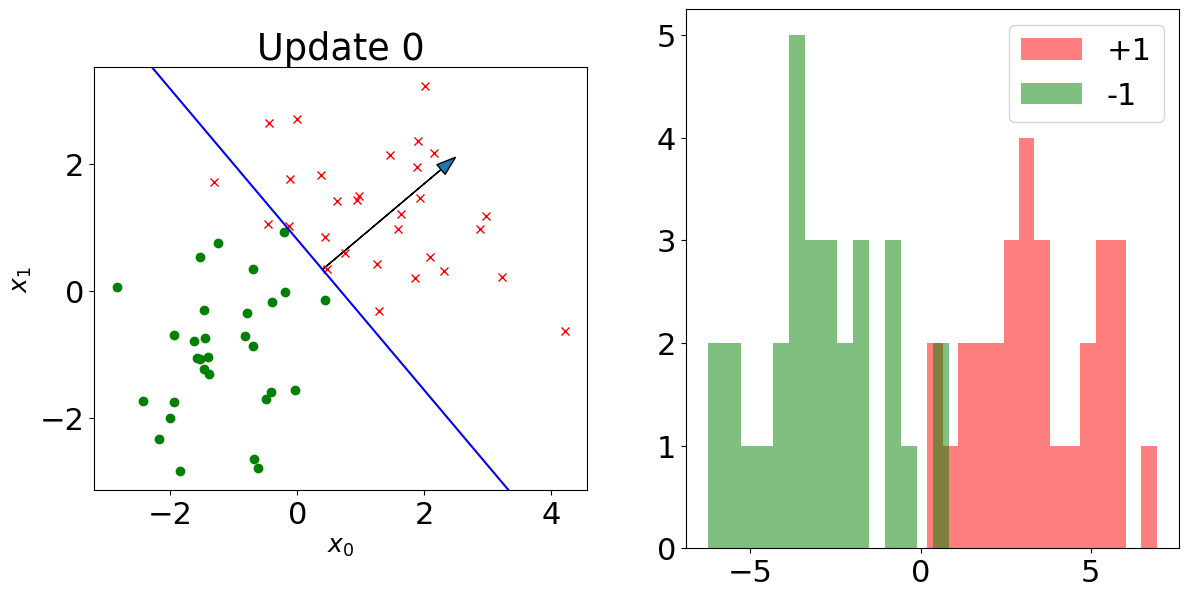

In [19]:
f, ax = plt.subplots(1, 2, figsize=(14,7))
w, b, x_select = init_perceptron(x_plus, x_minus)
handle = plot.init_perceptron(f, ax, x_plus, x_minus, w, b)
mlai.write_figure("perceptron_init.svg", directory="./ml")

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/perceptron-init.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Initial perceptron setup showing data points and initial
decision boundary.</i>

## Drawing Decision Boundary

The decision boundary is where the output of the function changes from
-1 to +1 (or vice versa) so it’s the point at which the argument of the
$\text{sign}$ function is zero. So in other words, the decision boundary
is given by the *line* defined by $x_1 w_1 + x_2 w_2 = -b$ (where we
have dropped the index $i$ for convenience). In this two dimensional
space the decision boundary is defined by a line. In a three dimensional
space it would be defined by a *plane* and in higher dimensional spaces
it is defined by something called a
[*hyperplane*](http://en.wikipedia.org/wiki/Hyperplane). This equation
is therefore often known as the *separating hyperplane* because it
defines the hyperplane that separates the data. To draw it in 2-D we can
choose some values to plot from $x_1$ and then find the corresponding
values for $x_2$ to plot using the rearrangement of the hyperplane
formula as follows

$$x_2 = -\frac{(b+x_1w_1)}{w_2}$$

Of course, we can also choose to specify the values for $x_2$ and
compute the values for $x_1$ given the values for $x_2$,

$$x_1 = -\frac{b + x_2w_2}{w_1}$$

## Switching Formulae

It turns out that sometimes we need to use the first formula, and
sometimes we need to use the second. Which formula we use depends on how
the separating hyperplane leaves the plot.

We want to draw the separating hyperplane in the bounds of the plot
which is showing our data. To think about which equation to use, let’s
consider two separate situations (actually there are a few more).

1.  If the separating hyperplane leaves the top and bottom of the plot
    then we want to plot a line with values in the $y$ direction (given
    by $x_2$) given by the upper and lower limits of our plot. The
    values in the $x$ direction can then be computed from the formula
    for the plane.

2.  Conversely if the line leaves the sides of the plot then we want to
    plot a line with values in the $x$ direction given by the limits of
    the plot. Then the values in the $y$ direction can be computed from
    the formula. Whether the line leaves the top/bottom or the sides of
    the plot is dependent on the relative values of $w_1$ and $w_2$.

This motivates a simple `if` statement to check which situation we’re
in.

In [20]:
import mlai

In [22]:
# %load -n mlai.update_perceptron
def update_perceptron(w, b, x_plus, x_minus, learn_rate):
    "Update the perceptron."
    # select a point at random from the data
    choose_plus = np.random.rand(1)>0.5
    updated=False
    if choose_plus:
        # choose a point from the positive data
        index = np.random.randint(x_plus.shape[0])
        x_select = x_plus[index, :]
        if np.dot(w, x_select)+b <= 0.:
            # point is currently incorrectly classified
            w += learn_rate*x_select
            b += learn_rate
            updated=True
    else:
        # choose a point from the negative data
        index = np.random.randint(x_minus.shape[0])
        x_select = x_minus[index, :]
        if np.dot(w, x_select)+b > 0.:
            # point is currently incorrectly classified
            w -= learn_rate*x_select
            b -= learn_rate
            updated=True
    return w, b, x_select, updated


The code for plotting the perceptron boundary is also provided. Here
note how many more lines are required for plotting than are required for
updating! The plotting code runs an entire optimisation of the
Perceptron algorithm showing the histrogram of points projected onto the
*normal vector*, $\mathbf{ w}$.

In [23]:
import mlai.plot as plot

Data passes: 1023


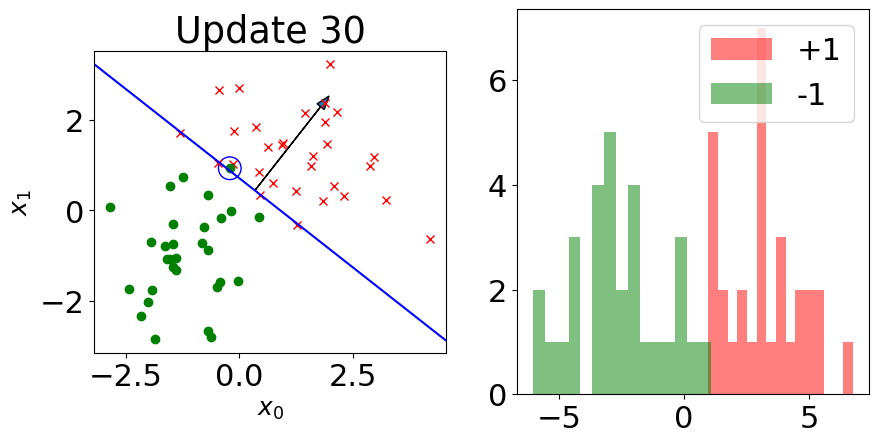

In [24]:
plots = plot.perceptron(x_plus, x_minus, seed=1000001, diagrams='./mlai')

In [25]:
import notutils as nu

In [26]:
nu.display_plots('perceptron{samp:0>3}.svg', directory='./ml', samp=(0, plots))

interactive(children=(IntSlider(value=30, description='samp', max=61), Output()), _dom_classes=('widget-intera…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/perceptron014.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>The perceptron decision boundary.</i>

## Perceptron Reflection

It’s worth having some reflections on the Perceptron and what it does.
The algorithm is simple enough that you can go through the exact
updates. What is it doing? When will it fail? What happens when you
can’t separate the classes with a linear hyperplane? Why does this stop
the algorithm converging? How might you fix the algorithm to make it
converge?

## The Objective Function

Another question is where is the objective function? I like the
Percptron because if you study the algorithm you get an insight into
what its doing and that gives an intuition about how its updating the
parameters. But it’s not easy to see how that connects to an objective
function. Very often to define an algorithm its much easier to start
with an *objective function* (otherwise known as a loss function, an
error function or a cost function).

## Objective Functions and Regression

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In classification we’re predicting discrete values, we use the sign
function in the Perceptron algorithm to convert from a continuous value
to a discrete by interpreting the continuos values as defining a
(hyper)plane. In regression we’re trying to predict a continuous
real-valued output rather than a discrete class label. Our goal is to
find a function that maps input features to real-valued predictions.

For linear regression, we assume a simple linear relationship between
input and output. For a single feature, our prediction function takes
the form $$
f(x_i) = mx_i + c
$$ where $m$ is the slope and $c$ is the intercept. How should we find
the best values for these parameters?

This is where the objective function comes in. We need a way to measure
how well our current parameter values fit the data. The least squares
objective function provides a principled approach by measuring the sum
of squared differences between our predictions and the true values $$
E(m, c) = \sum_{i=1}^n(y_i - f(x_i))^2
$$ The algorithm’s job is to find the values of $m$ and $c$ that
minimize this error function.

To demonstrate how regression works, we’ll create an artificial dataset
where we know the true underlying relationship. This allows us to test
whether our algorithm can recover the parameters we used to generate the
data.

We start by creating some random input values from a normal
distribution. These will serve as our feature values $x_i$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlai

In [ ]:
x = np.random.normal(size=(4, 1))

We now need to decide on a *true* value for $m$ and a *true* value for
$c$ to use for generating the data. In real-world scenarios, we don’t
know these values - that’s what we’re trying to learn. But for this
demonstration, we’ll choose specific values so we can verify our
algorithm works correctly.

In [ ]:
m_true = 1.4
c_true = -3.1

Now we can generate our target values using the linear relationship. The
mathematical formula $y_i = mx_i + c$ translates directly into code.
This creates an exact linear relationship - each point will lie exactly
on the line defined by our chosen slope and intercept.

In [ ]:
y = m_true*x+c_true

Plotting our artificial data helps us visualise the linear relationship
we’ve created. Since we generated the data deterministically using our
linear function, all points should lie exactly on a straight line. This
gives us a baseline to understand how the algorithm should perform in
the ideal case.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x, y, 'r.', markersize=10) # plot data as red dots
plt.xlim([-3, 3])
mlai.write_figure(filename='regression.svg', directory='./ml', transparent=True)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/regression.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>A simple linear regression.</i>

As expected, these points lie exactly on a straight line since we
generated them deterministically. However, real-world data is rarely
this perfect. There are always measurement errors, unknown factors, and
random variations that cause data to deviate from perfect relationships.

## Noise Corrupted Plot

To make our artificial dataset more realistic, we add Gaussian noise to
our target values. This simulates the random variations we’d encounter
in real data. The noise has zero mean, so it doesn’t systematically bias
our data, but it does add random scatter around the true linear
relationship.

The standard deviation of the noise (0.5 in this case) controls how much
the data deviates from the perfect line. Larger noise values make the
regression problem more challenging, while smaller values keep the data
closer to the underlying linear trend.

In [ ]:
noise = np.random.normal(scale=0.5, size=(4, 1)) # standard deviation of the noise is 0.5
y = m_true*x + c_true + noise
plt.plot(x, y, 'r.', markersize=10)
plt.xlim([-3, 3])
mlai.write_figure(filename='regression_noise.svg', directory='./ml', transparent=True)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/regression_noise.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>A simple linear regression with noise.</i>

## Contour Plot of Error Function

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-contour-plot.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-contour-plot.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

To understand how the least squares algorithm works, it’s helpful to
visualize the error function as a surface in parameter space. Since we
have two parameters ($m$ and $c$), our error function $E(m, c)$ defines
a surface in 3D space where the height at any point represents the error
for that combination of parameters.

The global minimum of this surface is given by the optimal parameter
values that best fit our data according to the least squares objective.
By visualising this surface through contour plots, we can gain intuition
about the optimization landscape and understand why gradient-based
methods work effectively for this problem.

First, we create vectors of parameter values to explore around the true
values we used to generate the data. We sample points in a range around
the true parameters to see how the error function behaves in the local
neighborhood.

In [ ]:
# create an array of linearly separated values around m_true
m_vals = np.linspace(m_true-3, m_true+3, 100)
# create an array of linearly separated values around c_true
c_vals = np.linspace(c_true-3, c_true+3, 100)

Next, we create a 2D grid from these parameter vectors. This grid allows
us to evaluate the error function at every combination of $m$ and $c$
values, giving us a complete picture of the error surface over the
parameter space we’re exploring.

In [ ]:
m_grid, c_grid = np.meshgrid(m_vals, c_vals)

Now we compute the error function at each combination of parameters. For
each point in our grid, we: 1. Use the parameter values to make
predictions: $\hat{y}_i = m \cdot x_i + c$  
2. Calculate the squared errors: $(y_i - \hat{y}_i)^2$ 3. Sum these
squared errors to get the total error for that parameter combination

This gives us the complete error surface that we can then visualize. The
nested loop structure evaluates the sum of squared errors formula at
each $(m, c)$ coordinate in our grid.

In [ ]:
E_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        E_grid[i, j] = ((y - m_grid[i, j]*x - c_grid[i, j])**2).sum()

With our error surface computed, we can now create a contour plot to
visualize the optimization landscape. A contour plot shows lines of
equal error value, similar to elevation contours on a topographic map.

Insights from this visualisation include: - *Bowl-shaped surface*: For
linear regression with least squares, the error surface is a smooth,
convex bowl with a unique global minimum - *Contour lines*: Each contour
represents parameter combinations that yield the same error value -
*Minimum location*: The centre of the concentric ellipses shows where
the error is minimized - this should be close to our true parameter
values

This visualisation helps explain why least squares regression has nice
mathematical properties and why optimisation algorithms converge
reliably to the solution.

In [ ]:
import mlai.plot as plot
import mlai

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
plot.regression_contour(f, ax, m_vals, c_vals, E_grid)
mlai.write_figure(filename='regression_contour.svg', directory='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/regression_contour.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Contours of the objective function for linear regression by
minimizing least squares.</i>

The contour plot reveals the characteristic elliptical shape of the
least squares error surface. The concentric ellipses represent
increasing levels of error as we move away from the optimal parameters.

Key observations from this visualization: - *Convex optimisation*: The
smooth, bowl-shaped surface guarantees that any local minimum is also
the global minimum - *Parameter sensitivity*: The shape of the ellipses
tells us how sensitive the error is to changes in each parameter -
*Optimization efficiency*: The regular, predictable shape means we can
develop optimisation methods that will converge quickly and reliably -
*True parameter location*: The minimum should occur very close to our
known true values ($m_{true} = 1.4$, $c_{true} = -3.1$)

*Warning:* This visualisation is great for giving some intuition, but
can be quite misleading about how these objective funcitons look in very
high dimensions. Unfortunately high dimensions are much harder to
visualise.

## Steepest Descent

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-gradient-descent.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-gradient-descent.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now that we understand the shape of the error surface from our contour
plot, we need an algorithm to find the minimum. Gradient descent is one
of the most fundamental optimization algorithms in machine learning.

The intuition behind gradient descent is simple: imagine you’re standing
on a hillside in fog and want to reach the bottom. Even though you can’t
see the whole landscape, you can feel the steepest downward slope at
your current position. By repeatedly taking steps in the steepest
downward direction, you’ll eventually reach the bottom.

Mathematically, the gradient points in the direction of steepest ascent,
so we move in the negative gradient direction to descend toward the
minimum. The algorithm works by: 1. Starting with an initial guess for
our parameters 2. Computing the gradient (slope) of the error function
at that point 3. Taking a small step in the opposite direction of the
gradient 4. Repeating until we converge to the minimum

## Algorithm

The first step in gradient descent is to initialise our parameters with
some starting values. The choice of initial values can affect how
quickly the algorithm converges, although because of the simple shape of
the linear regression objective (known as a convex optimisation), any
starting point should eventually reach the global minimum.

Here we’re starting with $m = 0$ (no slope) and $c = -5$ (a negative
intercept). These values are deliberately chosen to be different from
our true values ($m_{true} = 1.4$, $c_{true} = -3.1$) so we can see the
algorithm as it navigates toward the correct solution. Normally you
would initialise with smaller values closer to the origin.

In [ ]:
m_star = 0.0
c_star = -5.0

## Offset Gradient

To implement gradient descent, we need to compute the partial
derivatives of our error function with respect to each parameter. We’ll
start with the gradient with respect to the intercept parameter $c$.

Our error function is $$E(m, c) = \sum_{i=1}^n(y_i - mx_i - c)^2$$

To find how the error changes with respect to $c$, we use the chain
rule. Each squared term contributes to the gradient, and since $c$
appears in every term with a coefficient of $-1$, the partial derivative
becomes:
$$\frac{\text{d}E(m, c)}{\text{d} c} = -2\sum_{i=1}^n(y_i - mx_i - c)$$

The negative sign comes from differentiating the $-c$ term inside the
squared expression, and the factor of 2 comes from differentiating the
square.

In [ ]:
c_grad = -2*(y-m_star*x - c_star).sum()
print("Gradient with respect to c is ", c_grad)

## Deriving the Gradient

To understand how we derived the gradient formula, let’s work through
the calculus step by step.

The error function has the form:
$$E(m, c) = \sum_{i=1}^n(y_i - mx_i - c)^2$$

For the derivative with respect to $c$, note that $c$ appears in every
term of the sum. For each term $(y_i - mx_i - c)^2$, we apply the chain
rule:

1.  *Outer function*: The derivative of $u^2$ is $2u$
2.  *Inner function*: The derivative of $(y_i - mx_i - c)$ with respect
    to $c$ is $-1$

Combining these:
$\frac{d}{dc}[(y_i - mx_i - c)^2] = 2(y_i - mx_i - c) \cdot (-1)$

Since this applies to all terms in the sum, we get:
$$\frac{\text{d}E(m, c)}{\text{d} c} = -2\sum_{i=1}^n(y_i - mx_i - c)$$

## Slope Gradient

The gradient with respect to the slope parameter $m$ follows the same
chain rule approach, but now $m$ appears multiplied by $x_i$ in each
term.

For the derivative with respect to $m$, each term $(y_i - mx_i - c)^2$
contributes: 1. *Outer function*: Still $2u$ where
$u = (y_i - mx_i - c)$ 2. *Inner function*: The derivative of
$(y_i - mx_i - c)$ with respect to $m$ is $-x_i$

This gives us:
$$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^nx_i(y_i - mx_i - c)$$

Notice that each term is weighted by $x_i$, which makes intuitive sense:
data points with larger input values have more influence on the slope
parameter.

which can be implemented in python (numpy) as

In [ ]:
m_grad = -2*(x*(y-m_star*x - c_star)).sum()
print("Gradient with respect to m is ", m_grad)

## Update Equations

Now that we have computed both gradients, we can update our parameter
estimates. The key insight is that we don’t want to simply subtract the
full gradient from our current parameter values - this would likely
cause us to overshoot the minimum.

Instead, we take small steps in the negative gradient direction. This is
crucial because: 1. *Gradient changes*: As we move through parameter
space, the gradient itself changes, so we need to recompute it
frequently 2. *Overshooting*: Large steps might cause us to jump over
the minimum and potentially diverge 3. *Local information*: The gradient
only gives us local information about the slope, not global information
about the entire surface

The size of the step we take is controlled by the learning rate, which
we’ll introduce shortly.

## Move in Direction of Gradient

Let’s visualize what a single gradient descent step looks like on our
error surface. The plot shows our current parameter position as a green
star and the direction we should move (negative gradient direction) as
an arrow.

The arrow points toward lower error values, following the steepest
descent path from our current location. Notice how the arrow is
perpendicular to the contour lines - this is always true for gradients,
which by definition point in the direction of steepest increase (and
thus their negative points in the direction of steepest decrease).

The length and direction of this arrow tell us: - *Direction*: Where to
move in parameter space - *Magnitude*: How steep the slope is (longer
arrows mean steeper slopes) - *Step size*: We scale the arrow by the
learning rate to determine our actual step size

In [ ]:
import mlai.plot as plot

In [ ]:
f, ax = plt.subplots(figsize=plot.big_figsize)
plot.regression_contour(f, ax, m_vals, c_vals, E_grid)
ax.plot(m_star, c_star, 'g*', markersize=20)
ax.arrow(m_star, c_star, -m_grad*0.1, -c_grad*0.1, head_width=0.2)
mlai.write_figure(filename='regression_contour_step001.svg', directory='./ml/', transparent=True)

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/regression_contour_step001.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Single update descending the contours of the error surface
for regression.</i>

## Update Equations

The crucial hyperparameter in gradient descent is the learning rate
$\eta$, which controls how big steps we take in the direction of the
negative gradient. The learning rate is a balancing act:

-   *Too large*: We might overshoot the minimum, potentially causing the
    algorithm to diverge or oscillate wildly
-   *Too small*: The algorithm will converge very slowly, requiring many
    iterations to reach the minimum
-   *Just right*: We make steady progress toward the minimum without
    overshooting

The update equations formally incorporate the learning rate:

## Update Code

Let’s implement the parameter updates in code. We choose a learning rate
of 0.01, which is small enough to ensure stable convergence but large
enough to make reasonable progress.

The code shows the before and after parameter values, demonstrating how
a single gradient descent step moves us closer to the optimal solution.
After this update, we would recompute the gradients at our new position
and repeat the process.

In [ ]:
print("Original m was", m_star, "and original c was", c_star)
learn_rate = 0.01
c_star = c_star - learn_rate*c_grad
m_star = m_star - learn_rate*m_grad
print("New m is", m_star, "and new c is", c_star)

# Iterating Updates

One gradient step only takes us partway to the minimum. The full
gradient descent algorithm requires iterating these updates until
convergence. The process is:

1.  *Initialise* parameters with random or reasonable starting values
2.  *Compute gradients* at the current position
3.  *Update parameters* using the gradient and learning rate
4.  *Repeat* steps 2-3 until convergence (gradients become very small or
    error stops decreasing)

The beauty of this algorithm is its simplicity and general applicability
- the same basic approach works for many different types of models and
error functions.

## Gradient Descent Algorithm

Let’s run the complete gradient descent algorithm and visualize how the
parameters evolve over multiple iterations. The animation will show the
path taken through parameter space as the algorithm navigates toward the
minimum of the error surface.

Each frame shows:

-   *Current position*: The green star indicating our current parameter
    estimates
-   *Error contours*: The background showing the error landscape
-   *Path*: The trajectory we’ve taken from the starting point to the
    current position

Watch how the algorithm follows a curved path that eventually spiral
into the minimum, demonstrating the iterative nature of gradient-based
optimization.

In [ ]:
num_plots = plot.regression_contour_fit(x, y, diagrams='./ml')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
nu.display_plots('regression_contour_fit{num:0>3}.svg', directory='./ml', num=IntSlider(0, 0, num_plots, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/regression_contour_fit028.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Batch gradient descent for linear regression showing the
final converged solution.</i>

The final frame shows the algorithm has converged to the minimum of the
error surface. Notice how:

-   *Path shape*: The trajectory follows the natural gradient flow,
    starting with larger steps when gradients are large and taking
    smaller steps as we approach the minimum
-   *Convergence*: The final position should be very close to our true
    parameter values ($m_{true} = 1.4$, $c_{true} = -3.1$)
-   *Efficiency*: The algorithm finds the optimal solution automatically
    without us needing to specify the answer ahead of time

But note the limitations of gradient-based optimisation: by following
local information (the gradient), we can sometimes approach the minimum
only very slowly. To improve convergence we can look to more advanced
methods that consider curvature or, in neural networks, methods that use
a stochastic approximation to the gradient.

## Stochastic Gradient Descent

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-stochastic-gradient-descent.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/regression-stochastic-gradient-descent.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

While batch gradient descent is possible for small datasets, it becomes
computationally prohibitive when dealing with large-scale data. Consider
modern internet applications where you might have millions or billions
of data points - computing the full gradient by summing over all data
points in each iteration would be extremely slow.

Stochastic Gradient Descent (SGD) offers an elegant solution by
approximating the full gradient using just one (or a few) randomly
selected data points at each iteration. This approach:

1.  *Scales to large datasets*: Each update requires only O(1)
    computation regardless of dataset size
2.  *Enables online learning*: We can process data as it arrives,
    updating our model incrementally
3.  *Provides regularization*: The noise in stochastic updates can help
    escape local minima (though less relevant for convex problems like
    linear regression)
4.  *Mirrors biological learning*: Similar to how the perceptron
    processes one example at a time

The key insight is that while each individual gradient estimate is
noisy, on average it points in the correct direction toward the minimum.

## Stochastic Gradient Descent

To understand how stochastic gradient descent works mathematically,
let’s examine how the full batch gradient can be decomposed into
individual per-example contributions. This decomposition reveals why we
can update parameters using just one data point at a time.

The batch gradient is a sum over all data points:
$$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^nx_i(y_i - mx_i - c)$$

When we substitute this into our parameter update equation, we get:
$$m_\text{new} \leftarrow m_\text{old} + 2\eta\left[\sum_{i=1}^nx_i (y_i - m_\text{old}x_i - c_\text{old})\right]$$

The key insight is that this single large update is mathematically
equivalent to a sequence of smaller updates, each using just one data
point. However, there’s an important difference in practice - in SGD, we
update the parameters after each individual contribution rather than
keeping them fixed throughout the sum.

## Updating $c$ and $m$

Here’s where stochastic gradient descent fundamentally differs from
batch gradient descent. In batch gradient descent, we compute the full
gradient using fixed parameter values $m_{\text{old}}$ and
$c_{\text{old}}$ for all data points, then make one large update.

In stochastic gradient descent, we update the parameters after
processing each individual data point. This means:

1.  *Dynamic parameters*: The values of $m$ and $c$ change as we process
    each example, so later examples in the sequence see updated
    parameter values
2.  *Approximate gradient*: Since parameters change during the “sum,”
    we’re not computing the true batch gradient - we’re using a
    stochastic approximation
3.  *Online processing*: We can process data points as they arrive,
    making the algorithm suitable for streaming data

This dynamic updating is what makes SGD both powerful and noisy. The
noise can actually be beneficial - it provides a form of regularization
and can help escape poor local minima in more complex problems.

## Stochastic Gradient Descent

In practice, stochastic gradient descent simplifies to a very clean
algorithm. Since we process data points in random order, each SGD update
uses the gradient contribution from just one randomly selected example.
The update equations become:

For the slope parameter:
$$m_\text{new} = m_\text{old} + 2\eta\left[x_i (y_i - m_\text{old}x_i - c_\text{old})\right]$$

For the intercept parameter:
$$c_\text{new} = c_\text{old} + 2\eta\left[(y_i - m_\text{old}x_i - c_\text{old})\right]$$

Notice how these look exactly like the per-example terms from our batch
gradient, but now we apply them immediately rather than accumulating
them in a sum.

The implementation is straightforward: randomly select a data point,
compute its contribution to the gradient, and immediately update the
parameters. This process repeats for many iterations, with each
iteration using a different random example.

In [ ]:
# choose a random point for the update
i = np.random.randint(x.shape[0]-1)
# update m
m_star = m_star + 2*learn_rate*(x[i]*(y[i]-m_star*x[i] - c_star))
# update c
c_star = c_star + 2*learn_rate*(y[i]-m_star*x[i] - c_star)

## SGD for Linear Regression

Let’s now run the complete stochastic gradient descent algorithm and
visualize how it differs from batch gradient descent. The key
differences you’ll observe:

1.  *Noisier path*: SGD takes a much more erratic path through parameter
    space because each update is based on just one noisy example
2.  *More iterations needed*: While each iteration is faster (O(1) vs
    O(n)), SGD typically needs more iterations to converge
3.  *Never fully converges*: SGD will continue to “bounce around” near
    the minimum due to the noise in gradient estimates
4.  *Practical efficiency*: Despite the noise, SGD often reaches good
    solutions faster in wall-clock time for large datasets

The animation shows how the stochastic approximation creates a much more
chaotic but ultimately effective optimization trajectory.

In [ ]:
num_plots = plot.regression_contour_sgd(x, y, diagrams='./ml')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('regression_sgd_contour_fit{num:0>3}.svg',
    directory='./ml', num=IntSlider(0, 0, num_plots, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/regression_sgd_contour_fit058.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Stochastic gradient descent for linear regression showing the
noisy but effective optimization path.</i>

The final visualisation demonstrates the behaviour of SGD compared to
batch gradient descent:

**Optimization Path Characteristics:**

-   *Erratic trajectory*: The path zigzags chaotically through parameter
    space rather than following smooth contours
-   *Local exploration*: The algorithm continues to explore around the
    minimum even after finding a good solution
-   *Effective convergence*: Despite the noise, SGD successfully
    navigates to the optimal region

**Practical Implications:**

-   *Computational efficiency*: Each SGD iteration processes just one
    example, making it ideal for large datasets where computing the full
    gradient is prohibitive
-   *Online learning capability*: The algorithm can adapt to new data
    points as they arrive, enabling real-time model updates
-   *Regularization effect*: The noise in SGD can prevent overfitting
    and help escape poor local minima in more complex optimization
    landscapes

**Trade-offs:**

-   *Convergence vs. efficiency*: SGD trades smooth convergence for
    computational speed - it may never fully settle but reaches good
    solutions quickly
-   *Hyperparameter sensitivity*: Learning rate tuning becomes more
    critical as too large values can cause divergence, while too small
    values slow convergence excessively

This stochastic approach forms the foundation for training modern
machine learning models, particularly deep neural networks where batch
gradient computation is computationally intractable.

## Reflection on Linear Regression and Supervised Learning

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-iterative.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/linear-regression-iterative.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Think about:

1.  What effect does the learning rate have in the optimization? What’s
    the effect of making it too small, what’s the effect of making it
    too big? Do you get the same result for both stochastic and steepest
    gradient descent?

2.  The stochastic gradient descent doesn’t help very much for such a
    small data set. It’s real advantage comes when there are many.

for loss functions.

## Further Reading

-   Section 1.1.3 of Rogers and Girolami (2011)

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References

Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC
Press.

Rosenblatt, F., 1958. The perceptron: A probabilistic model for
information storage and organization in the brain. Psychological Review
65, 386–408. <https://doi.org/10.1037/h0042519>